In [1]:
import pandas as pd
from pathlib import Path

def read_output_files(dirs):
    files = []
    for d in dirs:
        files.extend(Path(d).glob('*/*.csv'))

    scores_all = []

    for f in files:
        df = pd.read_csv(f)
        df['dir'] = str(Path(f).parent)
        scores_all.append(df)

    return pd.concat(scores_all)


In [2]:
output_dirs = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1', \
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f2', \
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f3']

output_dirs_norm = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm_k20_f1', \
                    '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm_k20_f2', \
                    '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm_k20_f3', \
                    '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm_k20_f4']

output_dirs_norm2 = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f1', \
                     '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f2', \
                    '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f3', \
                    '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f4']


In [3]:
df = read_output_files(output_dirs)
print(df['dir'].unique())
print(df['fset'].unique())
print(df['cv'].unique())
print('repeats: ' + str(df['repeat'].max()))
df.head()

['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1/202204221637'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1/202204251132'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1/202204261147'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f2/202204251134'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f2/202204211541'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f3/202204221633']
['f_mot' 'f_mot_morph' 'f_mot_morph_dyn']
['StratifiedGroupKFold(n_splits=4, random_state=None, shuffle=True)']
repeats: 20


,accuracy,precision,recall,f1,classifier,kernel_size,epochs,repeat,cv,fset,dir
0,0.478261,0.461538,0.352941,0.400000,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
1,0.506667,0.521739,0.315789,0.393443,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
2,0.521739,0.600000,0.250000,0.352941,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
3,0.539474,0.666667,0.444444,0.533333,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
4,0.549296,0.555556,0.897436,0.686275,InceptionTime,20,10,2,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...


In [4]:
#df.groupby('epochs')['accuracy'].mean()
grp = df.groupby(['fset','epochs'])['accuracy'].agg(['mean','std']).reset_index()
grp.head()

,fset,epochs,mean,std
0,f_mot,10,0.516647,0.055945
1,f_mot,20,0.506764,0.060415
2,f_mot,30,0.514310,0.072176
3,f_mot,40,0.516203,0.058688
4,f_mot,50,0.513386,0.059481


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-k18ah_6k because the default path (/home/hajaalin/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


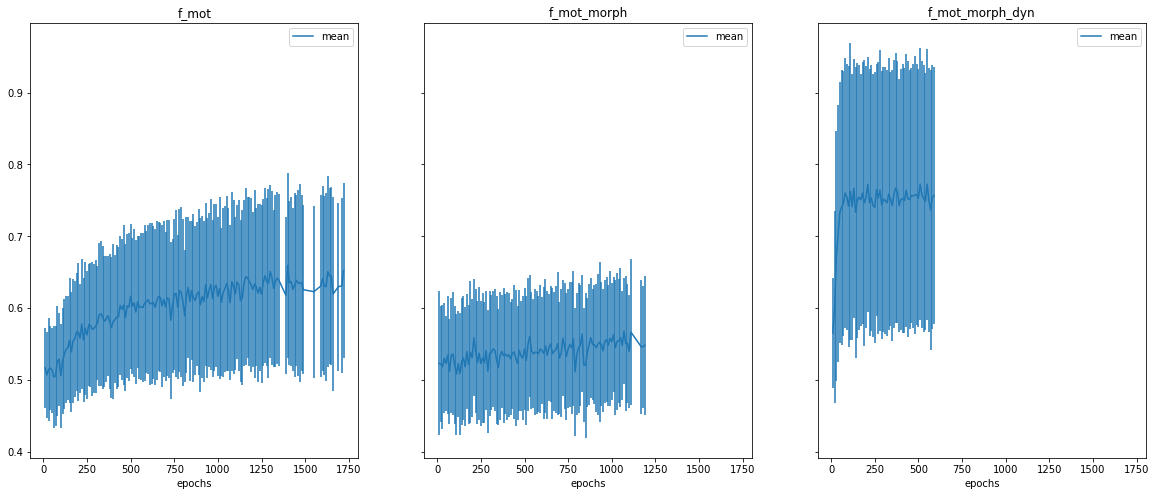

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches(20,8)
i=0
for fset in grp['fset'].unique():
    #print(fset)

    grp[grp['fset']==fset].plot('epochs', yerr='std', label='mean', title=fset, ax=axs[i])
    i = i+1
    

In [6]:
grp[grp['fset']=='f_mot'].tail()

,fset,epochs,mean,std
153,f_mot,1650,0.644882,0.123928
154,f_mot,1660,0.619505,0.135065
155,f_mot,1690,0.629533,0.117479
156,f_mot,1710,0.631052,0.122238
157,f_mot,1720,0.652208,0.121422


In [7]:
grp[grp['fset']=='f_mot_morph_dyn'].tail()

,fset,epochs,mean,std
326,f_mot_morph_dyn,550,0.772559,0.188804
327,f_mot_morph_dyn,560,0.750491,0.183274
328,f_mot_morph_dyn,570,0.736655,0.194573
329,f_mot_morph_dyn,580,0.754422,0.183710
330,f_mot_morph_dyn,590,0.756710,0.178427


In [8]:
dfn = read_output_files(output_dirs_norm)
dfn.head()


,accuracy,precision,recall,f1,classifier,kernel_size,epochs,repeat,cv,fset,job_id,dir
0,0.527778,0.575000,0.575000,0.575000,InceptionTime,20,100,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270863424,/proj/hajaalin/Projects/n_track_ML/output/cros...
1,0.864865,0.928571,0.847826,0.886364,InceptionTime,20,100,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270863424,/proj/hajaalin/Projects/n_track_ML/output/cros...
2,1.000000,1.000000,1.000000,1.000000,InceptionTime,20,100,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270863424,/proj/hajaalin/Projects/n_track_ML/output/cros...
3,0.958904,0.892857,1.000000,0.943396,InceptionTime,20,100,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270863424,/proj/hajaalin/Projects/n_track_ML/output/cros...
4,0.449275,0.468085,0.628571,0.536585,InceptionTime,20,100,2,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270863424,/proj/hajaalin/Projects/n_track_ML/output/cros...


In [9]:

grp = dfn.groupby(['fset','epochs'])['accuracy'].agg(['mean','std']).reset_index()
grp.head()

,fset,epochs,mean,std
0,f_mot,100,0.805768,0.197606
1,f_mot,120,0.796668,0.193545
2,f_mot,140,0.803788,0.194655
3,f_mot,160,0.801145,0.200553
4,f_mot,180,0.803455,0.190394


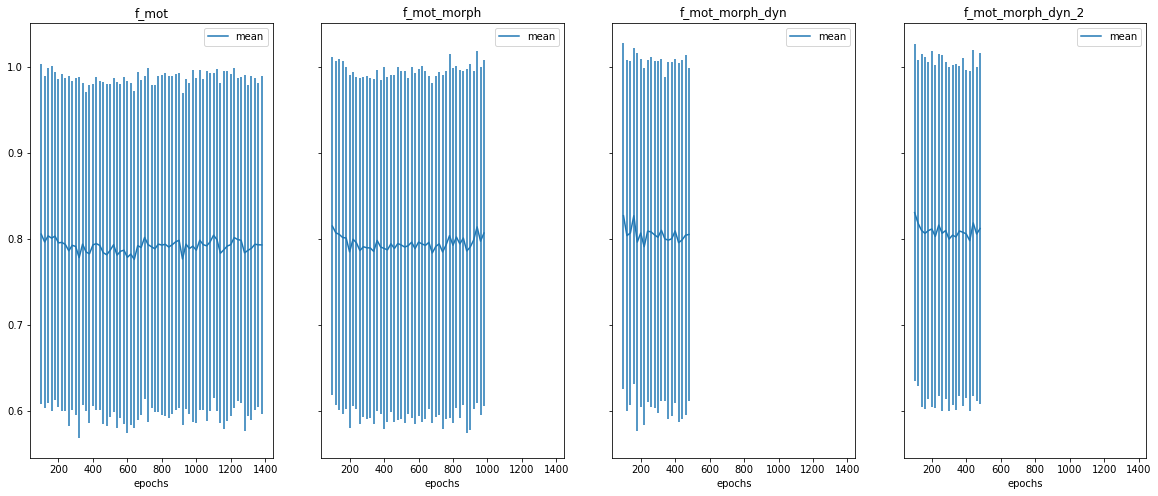

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
fig.set_size_inches(20,8)
i=0
for fset in grp['fset'].unique():
    #print(fset)

    grp[grp['fset']==fset].plot('epochs', yerr='std', label='mean', title=fset, ax=axs[i])
    i = i+1
    

In [11]:
dfn2 = read_output_files(output_dirs_norm2)
dfn2.head()


,accuracy,precision,recall,f1,classifier,kernel_size,epochs,repeat,cv,fset,job_id,dir
0,0.527027,0.460000,0.741935,0.567901,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270882167,/proj/hajaalin/Projects/n_track_ML/output/cros...
1,0.753623,0.820513,0.761905,0.790123,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270882167,/proj/hajaalin/Projects/n_track_ML/output/cros...
2,0.828571,0.925926,0.714286,0.806452,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270882167,/proj/hajaalin/Projects/n_track_ML/output/cros...
3,0.894737,0.951220,0.866667,0.906977,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270882167,/proj/hajaalin/Projects/n_track_ML/output/cros...
4,0.449275,0.517241,0.384615,0.441176,InceptionTime,20,10,2,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270882167,/proj/hajaalin/Projects/n_track_ML/output/cros...


In [12]:

grp = dfn2.groupby(['fset','epochs'])['accuracy'].agg(['mean','std']).reset_index()
grp.head()

,fset,epochs,mean,std
0,f_mot,2,0.709283,0.148645
1,f_mot,4,0.766381,0.166802
2,f_mot,6,0.785615,0.179418
3,f_mot,8,0.793385,0.181991
4,f_mot,10,0.791589,0.180168


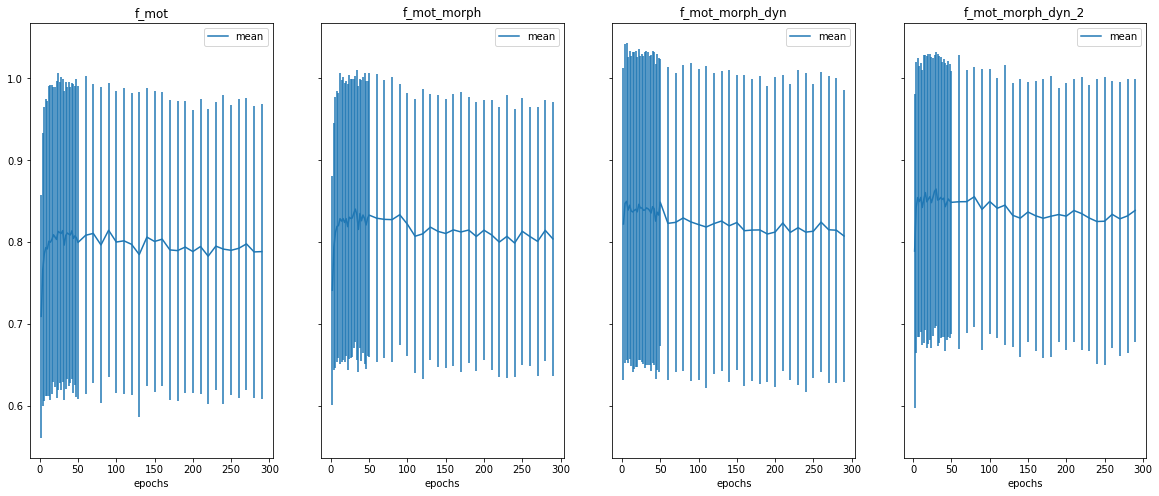

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
fig.set_size_inches(20,8)
i=0
for fset in grp['fset'].unique():
    #print(fset)

    grp[grp['fset']==fset].plot('epochs', yerr='std', label='mean', title=fset, ax=axs[i])
    i = i+1
    

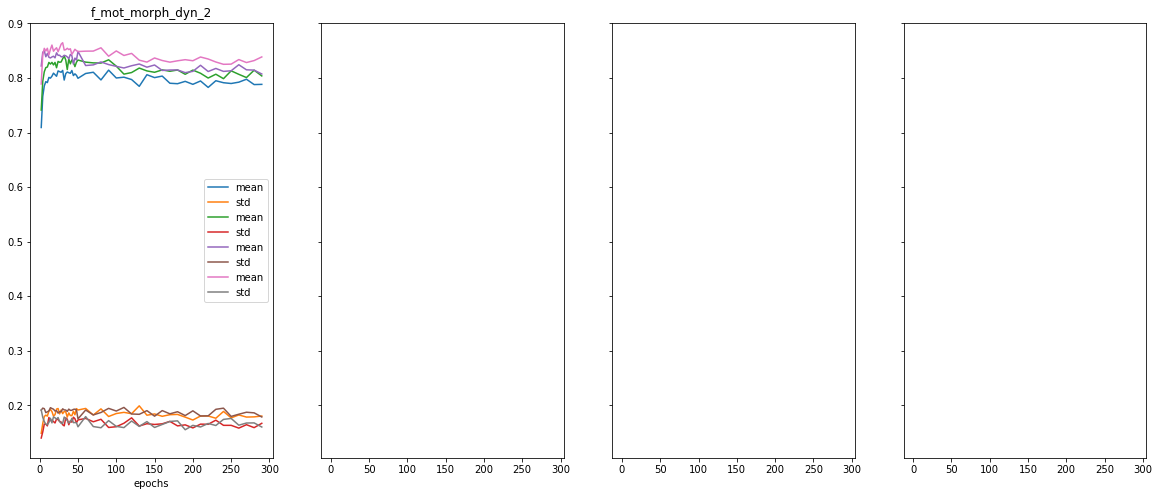

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
fig.set_size_inches(20,8)
i=0
for fset in grp['fset'].unique():
    #print(fset)

    grp[grp['fset']==fset].plot('epochs', yerr=None, label='mean', title=fset, ax=axs[i])
    #i = i+1
    